## 가설 : 거주 인구가 많을 수록 버스 정류장 수 또한 많이 필요할 것이다.


In [1]:
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [2]:
bus = pd.read_csv("df_seoul_bus_station.csv", sep=",")

bus

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040
5,광진구,269,41,2749448,2753411,118.352546,118.523137
6,구로구,486,79,4942197,4730992,119.235615,114.140076
7,금천구,345,58,3776658,3581930,123.098370,116.751304
8,노원구,514,57,4353295,4292724,88.476211,87.245168
9,도봉구,359,46,3304305,3211421,106.859356,103.855540


In [3]:
people = pd.read_csv("seoul_people.csv", sep=",")
people

,자치구,인구
0,종로구,153684
1,중구,131450
2,용산구,236518
3,성동구,291609
4,광진구,353110
5,동대문구,352592
6,중랑구,393600
7,성북구,442680
8,강북구,300824
9,도봉구,318100


In [4]:
bus_people = pd.merge(bus, people, on = '자치구')

In [5]:
bus_people

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,인구
0,강남구,499,91,8030483,7569213,128.767927,121.371512,537338
1,강동구,369,21,2890053,2830506,99.161194,97.118065,465097
2,강북구,413,67,4825181,4671783,133.020373,128.791504,300824
3,강서구,566,49,4681083,4652828,88.119480,87.587591,578426
4,관악구,466,86,7655819,7792476,154.753674,157.516040,500336
5,광진구,269,41,2749448,2753411,118.352546,118.523137,353110
6,구로구,486,79,4942197,4730992,119.235615,114.140076,419984
7,금천구,345,58,3776658,3581930,123.098370,116.751304,244901
8,노원구,514,57,4353295,4292724,88.476211,87.245168,514445
9,도봉구,359,46,3304305,3211421,106.859356,103.855540,318100


In [6]:
bus_people.corr()

,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,인구
정류장수,1.000000,0.258798,0.566681,0.578479,-0.135318,-0.099146,0.566615
노선수,0.258798,1.000000,0.665488,0.652642,0.493541,0.470440,-0.281536
승차총승객수,0.566681,0.665488,1.000000,0.996610,0.538720,0.547384,0.364433
하차총승객수,0.578479,0.652642,0.996610,1.000000,0.534826,0.555137,0.388119
승차평균승객수,-0.135318,0.493541,0.538720,0.534826,1.000000,0.989288,-0.269854
하차평균승객수,-0.099146,0.470440,0.547384,0.555137,0.989288,1.000000,-0.207643
인구,0.566615,-0.281536,0.364433,0.388119,-0.269854,-0.207643,1.000000


In [7]:
plt.rc("font", family = "Malgun Gothic")

sns.set(font = "Malgun Gothic",
       rc={"axes.unicode_minus":False},
       style = "darkgrid")

<AxesSubplot:>

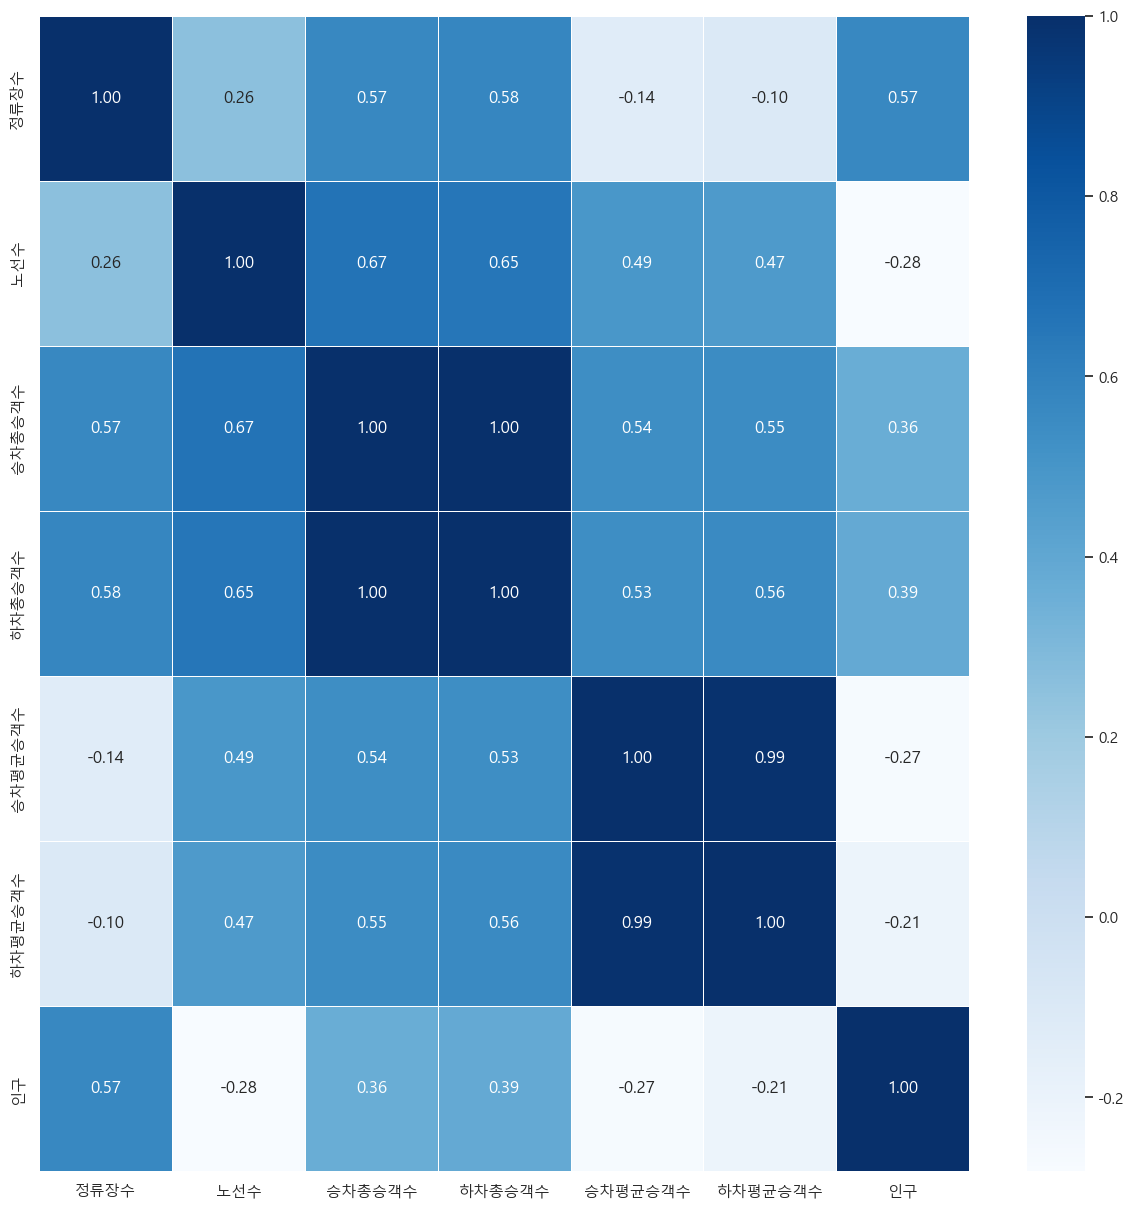

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(data = bus_people.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [9]:
test_stat, p_val = stats.shapiro(bus_people.인구)
print("Test-statistics : {0}, bus_people p-value : {1}".format(test_stat, p_val))

Test-statistics : 0.9902743697166443, bus_people p-value : 0.9962607026100159


In [10]:
test_stat, p_val = stats.shapiro(bus_people.정류장수)
print("Test-statistics : {0}, bus_line p-value : {1}".format(test_stat, p_val))

Test-statistics : 0.9804375767707825, bus_line p-value : 0.893642008304596


In [11]:
stats.ttest_ind(bus_people['정류장수'], bus_people['인구'])

Ttest_indResult(statistic=-15.421254801991811, pvalue=3.1694916143626485e-20)

In [12]:
pearsoncorr = stats.pearsonr(bus_people.정류장수, bus_people.인구)
pearsoncorr

PearsonRResult(statistic=0.5666148323603177, pvalue=0.0031462922429467935)

In [13]:
bus_people['정류장수별 인구수'] = bus_people['인구'] / bus_people['정류장수']

In [14]:
bus_people.sort_values(by=['정류장수별 인구수'], ascending=[False], inplace = True)


In [15]:
bus_people

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,인구,정류장수별 인구수
17,송파구,415,55,5641742,5603488,114.270072,113.495260,668261,1610.267470
18,양천구,319,56,4009172,3851173,97.627526,93.780086,449378,1408.708464
5,광진구,269,41,2749448,2753411,118.352546,118.523137,353110,1312.676580
1,강동구,369,21,2890053,2830506,99.161194,97.118065,465097,1260.425474
10,동대문구,306,73,5240565,5115379,131.841430,128.692017,352592,1152.261438
0,강남구,499,91,8030483,7569213,128.767927,121.371512,537338,1076.829659
4,관악구,466,86,7655819,7792476,154.753674,157.516040,500336,1073.682403
24,중랑구,380,48,3792541,3740923,87.403863,86.214261,393600,1035.789474
3,강서구,566,49,4681083,4652828,88.119480,87.587591,578426,1021.954064
8,노원구,514,57,4353295,4292724,88.476211,87.245168,514445,1000.865759


In [16]:
bus_people = bus_people.reset_index(drop=True)

In [17]:
bus_people

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,인구,정류장수별 인구수
0,송파구,415,55,5641742,5603488,114.270072,113.495260,668261,1610.267470
1,양천구,319,56,4009172,3851173,97.627526,93.780086,449378,1408.708464
2,광진구,269,41,2749448,2753411,118.352546,118.523137,353110,1312.676580
3,강동구,369,21,2890053,2830506,99.161194,97.118065,465097,1260.425474
4,동대문구,306,73,5240565,5115379,131.841430,128.692017,352592,1152.261438
5,강남구,499,91,8030483,7569213,128.767927,121.371512,537338,1076.829659
6,관악구,466,86,7655819,7792476,154.753674,157.516040,500336,1073.682403
7,중랑구,380,48,3792541,3740923,87.403863,86.214261,393600,1035.789474
8,강서구,566,49,4681083,4652828,88.119480,87.587591,578426,1021.954064
9,노원구,514,57,4353295,4292724,88.476211,87.245168,514445,1000.865759


In [19]:
bus_people['jinseokrank'] = list(range(1,26))

In [18]:
x =bus_people['인구'] #x값
y =bus_people['정류장수']  #y값

In [19]:
train_data = sm.add_constant(x, has_constant='add')
train_data

,const,인구
0,1.0,668261
1,1.0,449378
2,1.0,353110
3,1.0,465097
4,1.0,352592
5,1.0,537338
6,1.0,500336
7,1.0,393600
8,1.0,578426
9,1.0,514445


In [20]:
results = sm.OLS(y, train_data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   정류장수   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     10.88
Date:                Tue, 15 Nov 2022   Prob (F-statistic):            0.00315
Time:                        00:35:35   Log-Likelihood:                -146.77
No. Observations:                  25   AIC:                             297.5
Df Residuals:                      23   BIC:                             300.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        238.6650     59.151      4.035      0.001     116.302     361.028
인구             0.0005      0.000      3.298      0.003       0.000       0.001
==============================================================================
Omnibus:                        0.182   Durbin-Watson:                   1.064
Prob(Omnibus):                  0.913   Jarque-Bera (JB):                0.393
Skew:                          -0.009   Prob(JB):                        0.822
Kurtosis:                       2.386   Cond. No.                     1.35e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
results.params

const    238.664954
인구         0.000478
dtype: float64

In [40]:
labels = bus_people['자치구']
pred = 238.6650 +  0.0005*x

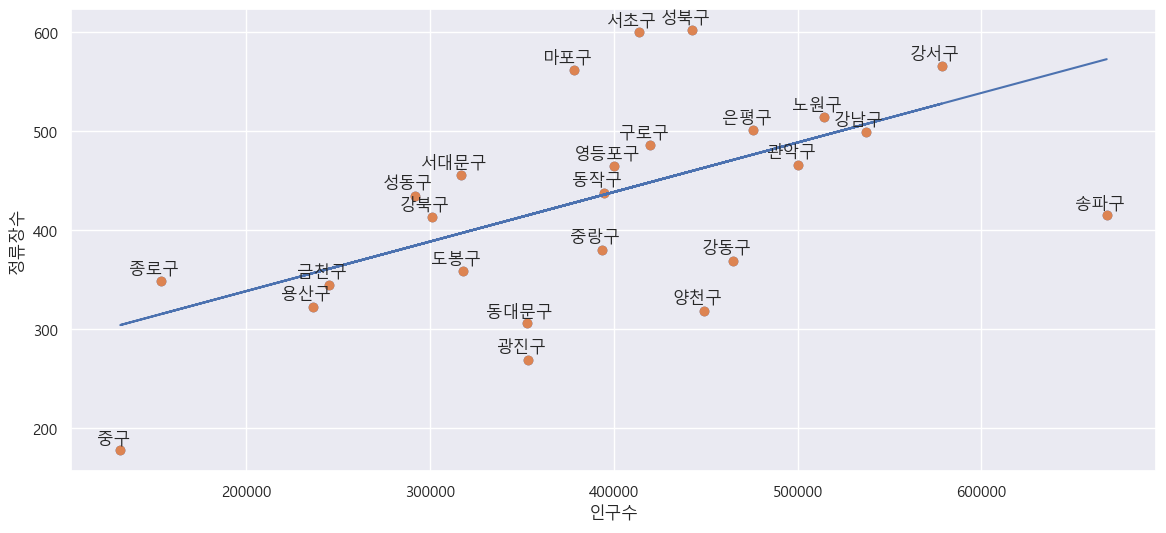

In [42]:
plt.figure(figsize=(14,6))
plt.scatter(x,y)
a= x.tolist()
b= y.tolist()

plt.scatter(x,y) 
for lb,a,b in zip(labels,a,b):
    plt.annotate(lb, # 출력할 텍스트, 여기에선 y좌표
                xy=(a,b), # 텍스트를 출력할 좌표
                textcoords="offset points", # 텍스트 위치를 (x,y)로 부터의 오프셋 (offset_x, offset_y)로 지정
                xytext=(-5, 5), # (x, y)로 부터의 오프셋 (offset_x, offset_y), 여기에선 y 좌표로 +20 이동합니다.
                ha='center') # 수평방향으로 중앙정렬합니다.
plt.xlabel('인구수')
plt.ylabel('정류장수')
plt.plot(x,pred)
plt.show()

In [20]:
bus_people

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,인구,정류장수별 인구수,jinseokrank
0,송파구,415,55,5641742,5603488,114.270072,113.495260,668261,1610.267470,1
1,양천구,319,56,4009172,3851173,97.627526,93.780086,449378,1408.708464,2
2,광진구,269,41,2749448,2753411,118.352546,118.523137,353110,1312.676580,3
3,강동구,369,21,2890053,2830506,99.161194,97.118065,465097,1260.425474,4
4,동대문구,306,73,5240565,5115379,131.841430,128.692017,352592,1152.261438,5
5,강남구,499,91,8030483,7569213,128.767927,121.371512,537338,1076.829659,6
6,관악구,466,86,7655819,7792476,154.753674,157.516040,500336,1073.682403,7
7,중랑구,380,48,3792541,3740923,87.403863,86.214261,393600,1035.789474,8
8,강서구,566,49,4681083,4652828,88.119480,87.587591,578426,1021.954064,9
9,노원구,514,57,4353295,4292724,88.476211,87.245168,514445,1000.865759,10


In [22]:
bus_people = bus_people[['자치구','jinseokrank']]

In [23]:
bus_people

,자치구,jinseokrank
0,송파구,1
1,양천구,2
2,광진구,3
3,강동구,4
4,동대문구,5
5,강남구,6
6,관악구,7
7,중랑구,8
8,강서구,9
9,노원구,10


In [24]:
fpath = './jinseokbus.csv'
bus_people.to_csv(fpath, index=False, encoding='utf-8-sig')

In [27]:
rank1 = pd.read_csv("df_rank_man.csv", sep=",")
rank2 = pd.read_csv("rank_ayeon.csv", sep=",")
rank3 = pd.read_csv("jinseokbus.csv", sep=",")

bus_rank = pd.merge(rank1,rank2, on = '자치구')
bus_rank

,자치구,Man_Point,Unnamed: 0,8시승차총승객수,18시승차총승객수,출퇴근 시간대 승차총승객수,승차총승객수,출퇴근 시간대 비율,rank
0,강동구,1,16,243207,230162,473369,2890053,0.163792,17
1,강서구,2,8,422111,374614,796725,4681083,0.170201,9
2,중랑구,3,10,364149,277150,641299,3792541,0.169095,11
3,도봉구,4,14,301057,242744,543801,3304305,0.164573,15
4,노원구,5,24,322572,323074,645646,4353295,0.148312,25
5,양천구,6,17,337198,308290,645488,4009172,0.161003,18
6,송파구,7,6,488050,473448,961498,5641742,0.170426,7
7,은평구,8,18,460236,370327,830563,5201660,0.159673,19
8,구로구,9,5,431309,419660,850969,4942197,0.172184,6
9,금천구,10,1,386499,318086,704585,3776658,0.186563,2


In [28]:
bus_rank = pd.merge(bus_rank,rank3, on = '자치구')

In [29]:
bus_rank

,자치구,Man_Point,Unnamed: 0,8시승차총승객수,18시승차총승객수,출퇴근 시간대 승차총승객수,승차총승객수,출퇴근 시간대 비율,rank,jinseokrank
0,강동구,1,16,243207,230162,473369,2890053,0.163792,17,4
1,강서구,2,8,422111,374614,796725,4681083,0.170201,9,9
2,중랑구,3,10,364149,277150,641299,3792541,0.169095,11,8
3,도봉구,4,14,301057,242744,543801,3304305,0.164573,15,13
4,노원구,5,24,322572,323074,645646,4353295,0.148312,25,10
5,양천구,6,17,337198,308290,645488,4009172,0.161003,18,2
6,송파구,7,6,488050,473448,961498,5641742,0.170426,7,1
7,은평구,8,18,460236,370327,830563,5201660,0.159673,19,11
8,구로구,9,5,431309,419660,850969,4942197,0.172184,6,14
9,금천구,10,1,386499,318086,704585,3776658,0.186563,2,20


In [30]:
rank1

,자치구,Man_Point
0,강동구,1
1,강서구,2
2,중랑구,3
3,도봉구,4
4,노원구,5
5,양천구,6
6,송파구,7
7,은평구,8
8,구로구,9
9,금천구,10


In [32]:
rank2 = rank2[['자치구', 'rank']]

In [33]:
rank2

,자치구,rank
0,영등포구,1
1,금천구,2
2,강남구,3
3,서초구,4
4,마포구,5
5,구로구,6
6,송파구,7
7,성동구,8
8,강서구,9
9,동작구,10


In [34]:
bus_rank = pd.merge(rank1,rank2, on = '자치구')

In [35]:
bus_rank = pd.merge(bus_rank,rank3, on = '자치구')

In [36]:
bus_rank

,자치구,Man_Point,rank,jinseokrank
0,강동구,1,17,4
1,강서구,2,9,9
2,중랑구,3,11,8
3,도봉구,4,15,13
4,노원구,5,25,10
5,양천구,6,18,2
6,송파구,7,7,1
7,은평구,8,19,11
8,구로구,9,6,14
9,금천구,10,2,20


In [37]:
bus_rank['bus_rank'] = bus_rank['Man_Point'] + bus_rank['rank'] + bus_rank['jinseokrank']

In [41]:
bus_rank.sort_values(by=['bus_rank'], ascending=[True], inplace = True)

In [42]:
bus_rank

,자치구,Man_Point,rank,jinseokrank,bus_rank
6,송파구,7,7,1,15
1,강서구,2,9,9,20
0,강동구,1,17,4,22
2,중랑구,3,11,8,22
14,강남구,15,3,6,24
5,양천구,6,18,2,26
8,구로구,9,6,14,29
11,광진구,12,14,3,29
3,도봉구,4,15,13,32
9,금천구,10,2,20,32
